In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv').values.astype('int32')
test = pd.read_csv('test.csv').values.astype('int32')

In [3]:
x_train, x_test, y_train, y_test= train_test_split(train[:,1:],train[:,0],test_size=0.2)

In [4]:
x_train.shape,x_test.shape

((33600, 784), (8400, 784))

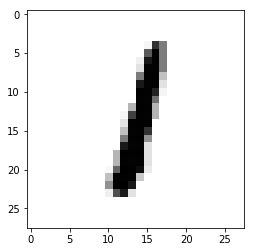

In [5]:
plt.imshow(x_train[0].reshape(28,28),cmap='Greys')

In [6]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [7]:
scale = np.max(x_train)
x_train = x_train.astype('float32') /scale
x_test = x_test.astype('float32') /scale

In [8]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
y_train.shape,y_test.shape

((33600, 10), (8400, 10))

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=10,batch_size=16,validation_split=0.1,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 30240 samples, validate on 3360 samples
Epoch 1/10
 - 61s - loss: 0.5146 - acc: 0.8385 - val_loss: 0.1499 - val_acc: 0.9554
Epoch 2/10
 - 60s - loss: 0.1598 - acc: 0.9505 - val_loss: 0.0875 - val_acc: 0.9738
Epoch 3/10
 - 60s - loss: 0.1127 - acc: 0.9646 - val_loss: 0.0839 - val_acc: 0.9741
Epoch 4/10
 - 59s - loss: 0.0865 - acc: 0.9720 - val_loss: 0.0585 - val_acc: 0.9827
Epoch 5/10
 - 60s - loss: 0.0740 - acc: 0.9767 - val_loss: 0.0527 - val_acc: 0.9836
Epoch 6/10
 - 65s - loss: 0.0602 - acc: 0.9813 - val_loss: 0.0512 - val_acc: 0.9833
Epoch 7/10
 - 65s - loss: 0.0507 - acc: 0.9844 - val_loss: 0.0437 - val_acc: 0.9848
Epoch 8/10
 - 65s - loss: 0.0444 - acc: 0.9854 - val_loss: 0.0417 - val_acc: 0.9878
Epoch 9/10
 - 63s - loss: 0.0383 - acc: 0.9873 - val_loss: 0.0487 - val_acc: 0.9848
Epoch 10/10
 - 65s - loss: 0.0367 - acc: 0.9878 - val_loss: 0.0353 - val_acc: 0.9890


In [13]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=0)
print('loss score:{0:.4f}, final score:{1:.4f}'.format(loss,accuracy))

loss score:0.0363, final score:0.9887


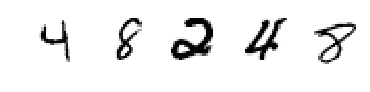

In [18]:
pick = np.random.randint(1,8400,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.axis('off')

In [19]:
X_test = test.astype('float32')
X_test = X_test.reshape(-1,28,28,1)/255.
predict = model.predict_classes(X_test)

In [22]:
model_json = model.to_json()
open('digit_recognizer_model_cnn.json','w').write(model_json)
model.save_weights('digit_recognizer_weights_model_cnn.h5')

In [23]:
def write_predict(predict,name):
    pd.DataFrame({'ImageId':list(range(1,len(predict)+1)),'label':predict}).to_csv(name,index=False,header=True)
    
write_predict(predict,'keras_digit_recognizer_by_cnn.csv')